# **СИИ lab1**

ФИО: Чэнь Жохань

ИСУ: 413107

### Линейная и логистическая регрессия

#### 0. import library

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, TensorDataset

#### 1. Датасет

In [107]:
data = pd.read_csv('California_Houses.csv')
data.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [108]:
print('Строки и столбики:', data.shape)

Строки и столбики: (20640, 14)


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [110]:
data.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


Функция для того, чтобы рисовать зависимость матрицы:

In [111]:
plt.style.use('default')

def correlation_matrix(table):
    
    numeric_cols = table.select_dtypes(include=[np.number]).columns
    corr_matrix = table[numeric_cols].corr().values

    plt.figure(figsize=(14, 10))
    
    im = plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
    plt.colorbar(im, label='Correlation коэф.')
    
    plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45, ha='right')
    plt.yticks(range(len(numeric_cols)), numeric_cols)
    
    for i in range(len(numeric_cols)):
        for j in range(len(numeric_cols)):
            plt.text(j, i, f'{corr_matrix[i, j]:.2f}', 
                    ha='center', va='center', 
                    color='white' if abs(corr_matrix[i, j]) > 0.5 else 'black')
    
    plt.title('Correlation matrix')
    plt.tight_layout()
    plt.show()


In [112]:
def analis_graph(series, figsize=(10, 6)):
    
    title = f"{series.name}"
    
    plt.figure(figsize=figsize)
    sorted_series = series.sort_values()
    plt.plot(sorted_series.index, sorted_series, marker='o', markersize=3, 
                linestyle='-', color='salmon', alpha=0.7)
    plt.title(f"{title}", fontsize=14)
    plt.xlabel("index", fontsize=12)
    plt.ylabel(series.name, fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    
    plt.figure(figsize=figsize)
    plt.scatter(series.index, series.values, alpha=0.6, color='purple', s=30)
    plt.title(f"{title}", fontsize=14)
    plt.xlabel("index", fontsize=12)
    plt.ylabel(series.name, fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

### 2. Предварительная обработка данных

2.1 пустое значение

In [113]:
data.isnull().any(axis=0)

Median_House_Value          False
Median_Income               False
Median_Age                  False
Tot_Rooms                   False
Tot_Bedrooms                False
Population                  False
Households                  False
Latitude                    False
Longitude                   False
Distance_to_coast           False
Distance_to_LA              False
Distance_to_SanDiego        False
Distance_to_SanJose         False
Distance_to_SanFrancisco    False
dtype: bool

Нет пустого значения, идём дальше

2.2 повторные данные

In [114]:
data.drop_duplicates()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166


тоже нет повторное строки, то мы начинаем выбрать нужное столбики.

### 2.3 Добыча и просеивание

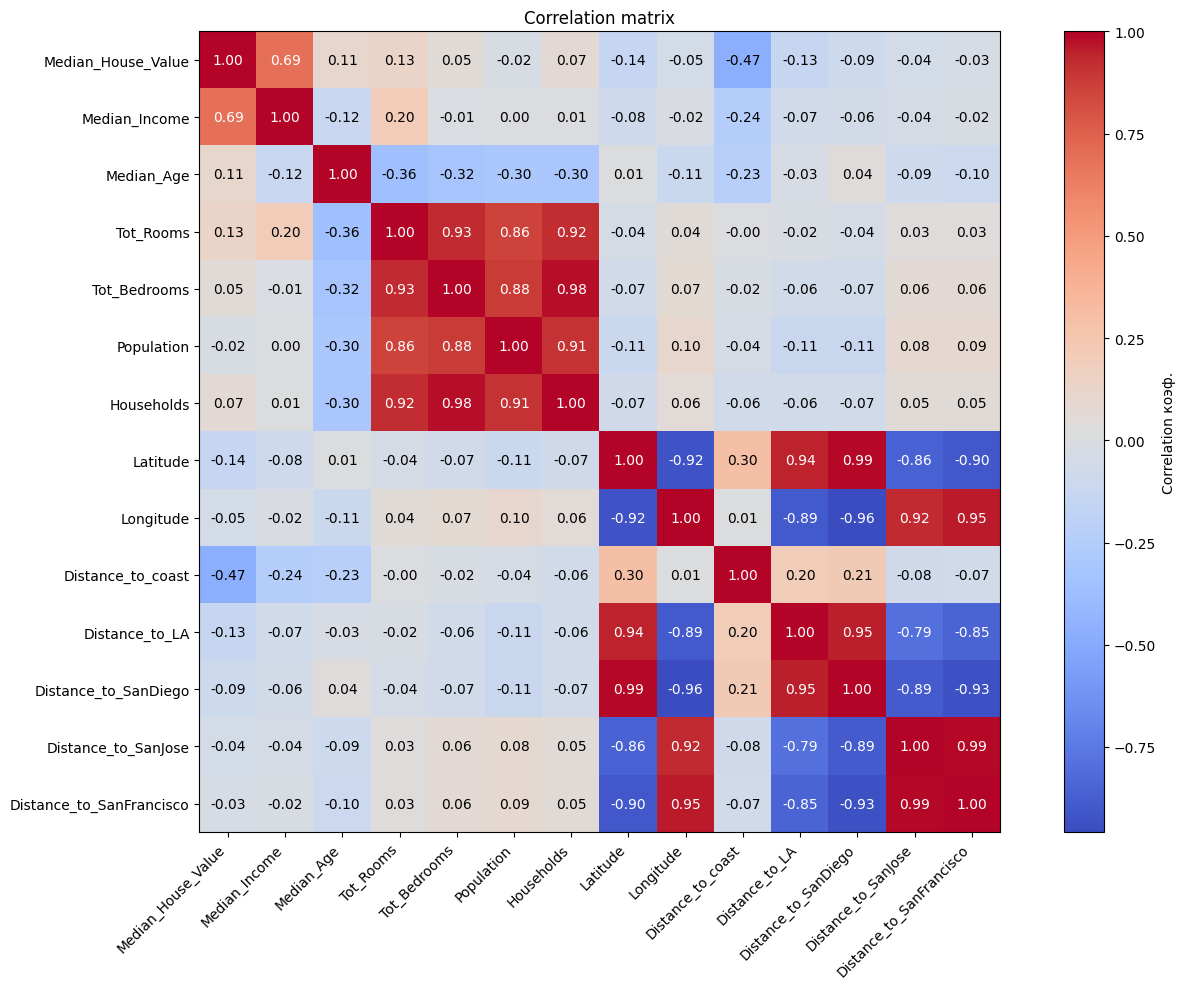

In [115]:
correlation_matrix(data)

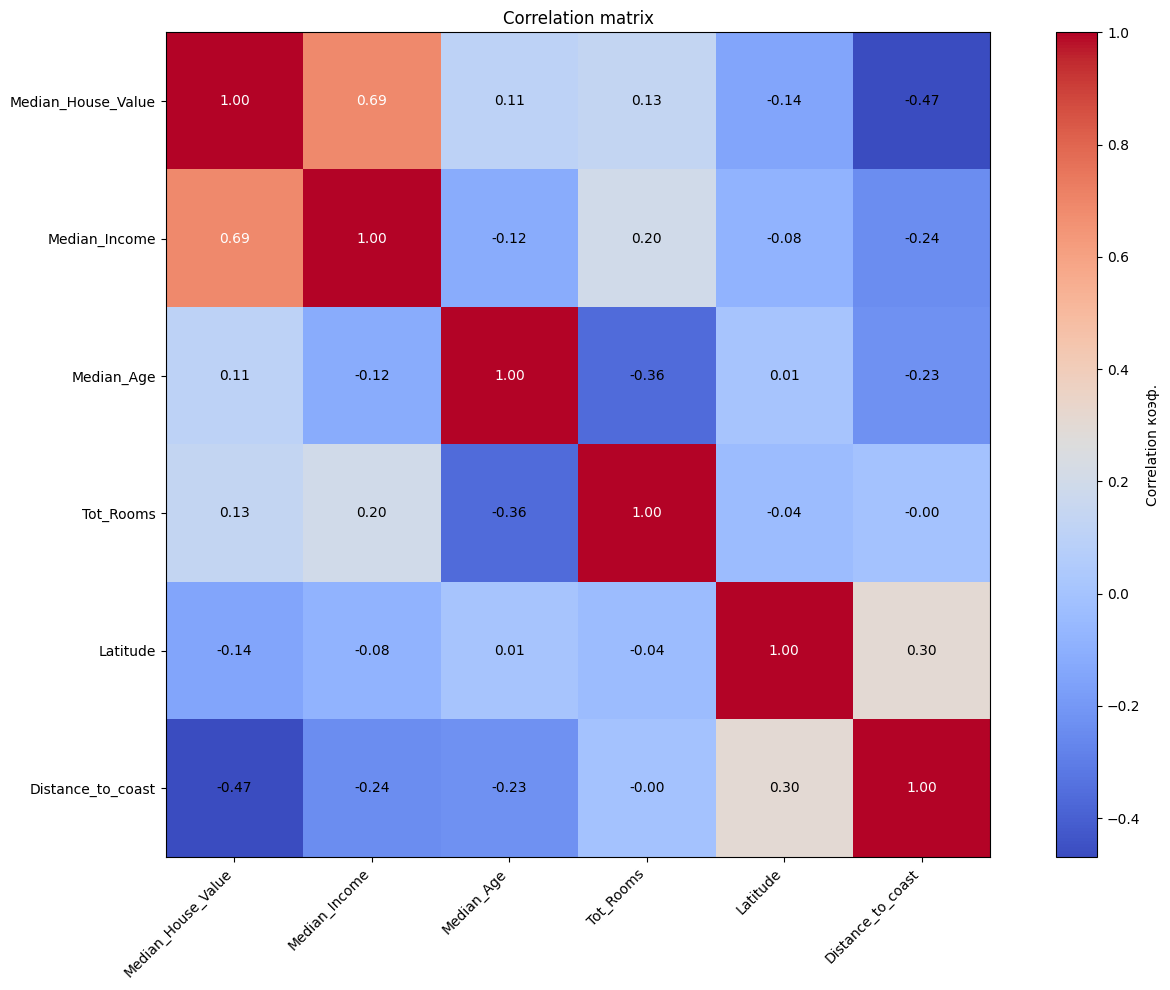

In [116]:
data_copy = data.copy()

data_copy = data_copy.drop(columns=['Tot_Bedrooms', 'Population', 'Longitude', 'Households', 'Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanFrancisco', 'Distance_to_SanJose'])

correlation_matrix(data_copy)

#### 2.4 Нормальзация данных

[0~1] нормальзация

In [117]:
def zero_one(x):
    x = (x-np.min(x))/(np.max(x)-np.min(x))
    return x

z - score нормальзация

In [118]:
def z_score(x):
    x = (x-np.mean(x))/np.std(x)
    return x

In [119]:
data_copy.head()
data_copy.to_csv('data_preprocessing.csv', index=False)

Нормальзуем каждые колонки

In [120]:
cols = ['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms', 'Latitude', 'Distance_to_coast']
data_copy_norm = data_copy.copy()
for col in cols:
    data_copy_norm[col] = z_score(data_copy[col])

cols_X = ['Median_Income', 'Median_Age', 'Tot_Rooms', 'Latitude', 'Distance_to_coast']

X = data_copy_norm[cols_X]
y = data_copy_norm['Median_House_Value']

X.to_csv('input.csv', index=False)
y.to_csv('output.csv', index=False)

### 3.  class модели

#### 3.1 module dataset

In [137]:
class CSVDataset(Dataset):
    # def __init__(self, x_path, y_path):
    #     self.x_data = pd.read_csv(x_path)
    #     self.y_data = pd.read_csv(y_path).values.flatten()
        
    #     self.x_tensor = torch.tensor(self.x_data.values, dtype=torch.float32)
    #     self.y_tensor = torch.tensor(self.y_data, dtype=torch.float32)
    
    # def get_dataloader(self, batch_size=32, shuffle=True):
    #     dataset = TensorDataset(self.x_tensor, self.y_tensor)
    #     return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)
    
    # def get_feature_dim(self):
    #     return self.x_data.shape[1]
    
    def __init__(self, x_path, y_path, is_classification=False):
        # 加载数据
        self.x_data = pd.read_csv(x_path)
        self.y_data = pd.read_csv(y_path).values.flatten()
        
        self.is_classification = is_classification
        
        # 数据预处理
        self._preprocess_data()
        
        # 转换为PyTorch张量
        self.x_tensor = torch.tensor(self.x_data.values, dtype=torch.float32)
        self.y_tensor = torch.tensor(self.y_data, dtype=torch.float32).view(-1, 1)
        
    def _preprocess_data(self):
        # 处理非数值列
        for col in self.x_data.columns:
            if self.x_data[col].dtype == 'object':
                try:
                    self.x_data[col] = pd.to_numeric(self.x_data[col])
                except ValueError:
                    self.x_data = pd.get_dummies(self.x_data, columns=[col], drop_first=True)
        
        # 填充缺失值
        self.x_data = self.x_data.fillna(self.x_data.mean())
        
        # 特征标准化
        self.x_data = (self.x_data - self.x_data.mean()) / self.x_data.std()
    
    def get_dataloader(self, batch_size=32, shuffle=True):
        dataset = TensorDataset(self.x_tensor, self.y_tensor)
        return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)
    
    def get_feature_dim(self):
        return self.x_data.shape[1]

#### 3.2 module model-linear 

In [138]:
class model_linear(Dataset):
    def __init__(self, input_dim, is_classification=False):
        # 手动初始化权重和偏置
        self.weight = torch.randn(input_dim, 1, requires_grad=True)
        self.bias = torch.zeros(1, 1, requires_grad=True)
        
        self.is_classification = is_classification
        
        self.train_losses = []
        self.val_losses = []
    
    def forward(self, x):
        # 手动计算线性变换
        out = torch.matmul(x, self.weight) + self.bias
        if self.is_classification:
            # 手动实现Sigmoid激活
            out = 1 / (1 + torch.exp(-out))
        return out
    
    def fit(self, train_loader, val_loader=None, epochs=100, lr=0.01):
        # 手动选择损失函数
        if self.is_classification:
            def criterion(outputs, labels):
                # 手动实现二元交叉熵损失
                return -torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))
        else:
            def criterion(outputs, labels):
                # 手动实现均方误差损失
                return torch.mean((outputs - labels) ** 2)
        
        # 手动定义参数列表
        parameters = [self.weight, self.bias]
        
        for epoch in range(epochs):
            train_loss = 0.0
            
            for inputs, labels in train_loader:
                # 前向传播
                outputs = self.forward(inputs)
                loss = criterion(outputs, labels)
                
                # 手动清零梯度
                for param in parameters:
                    if param.grad is not None:
                        param.grad.zero_()
                
                # 反向传播
                loss.backward()
                
                # 手动更新参数（梯度下降）
                with torch.no_grad():
                    for param in parameters:
                        param -= lr * param.grad
                
                train_loss += loss.item() * inputs.size(0)
            
            train_loss /= len(train_loader.dataset)
            self.train_losses.append(train_loss)
            
            if val_loader:
                val_loss = 0.0
                with torch.no_grad():
                    for inputs, labels in val_loader:
                        outputs = self.forward(inputs)
                        loss = criterion(outputs, labels)
                        val_loss += loss.item() * inputs.size(0)
                
                val_loss /= len(val_loader.dataset)
                self.val_losses.append(val_loss)
                
                if (epoch + 1) % 10 == 0:
                    print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
            else:
                if (epoch + 1) % 10 == 0:
                    print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}')
    
    def predict(self, x):
        with torch.no_grad():
            if isinstance(x, pd.DataFrame) or isinstance(x, np.ndarray):
                x_tensor = torch.tensor(x, dtype=torch.float32)
            elif isinstance(x, torch.Tensor):
                x_tensor = x
            
            outputs = self.forward(x_tensor)
            
            if self.is_classification:
                return (outputs >= 0.5).float()
            else:
                return outputs.numpy()
    
    def evaluate(self, test_loader):
        all_preds = []
        all_labels = []
        
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = self.forward(inputs)
                if self.is_classification:
                    preds = (outputs >= 0.5).float()
                else:
                    preds = outputs
                
                all_preds.extend(preds.numpy())
                all_labels.extend(labels.numpy())
        
        all_preds = np.array(all_preds)
        all_labels = np.array(all_labels)
        
        metrics = {}
        
        mse = np.mean((all_preds - all_labels) ** 2)
        rmse = np.sqrt(mse)
        mae = np.mean(np.abs(all_preds - all_labels))
        r2 = 1 - (np.sum((all_labels - all_preds) ** 2) / np.sum((all_labels - np.mean(all_labels)) ** 2))
        
        metrics['mse'] = mse
        metrics['rmse'] = rmse
        metrics['mae'] = mae
        metrics['r2'] = r2
        print(f"均方误差 (MSE): {mse:.4f}")
        print(f"均方根误差 (RMSE): {rmse:.4f}")
        print(f"平均绝对误差 (MAE): {mae:.4f}")
        print(f"R² 分数: {r2:.4f}")
        
        return metrics
    
    def plot_training_curve(self):
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(self.train_losses)+1), self.train_losses, label='loss train')
        if self.val_losses:
            plt.plot(range(1, len(self.val_losses)+1), self.val_losses, label='loss valid')
        plt.xlabel('round')
        plt.ylabel('loss')
        plt.legend()
        plt.grid(True)
        plt.show()

# 可视化训练前后差异的函数
def plot_predictions(y_true, y_pred, is_classification=False, feature=None, feature_name="特征"):
    plt.figure(figsize=(12, 5))
    
    if feature is not None:
        plt.subplot(1, 2, 1)
        plt.scatter(feature, y_true, alpha=0.5)
        plt.xlabel(feature_name)
        plt.ylabel('real')
        plt.title('before train: ' + feature_name + ' vs real')
        plt.grid(True)
        
        plt.subplot(1, 2, 2)
        plt.scatter(feature, y_pred, alpha=0.5, color='orange')
        plt.xlabel(feature_name)
        plt.ylabel('pred')
        plt.title('after train: ' + feature_name + ' vs pred')
        plt.grid(True)
    else:
        plt.scatter(range(len(y_true)), y_true, alpha=0.5, label='real')
        plt.scatter(range(len(y_pred)), y_pred, alpha=0.5, color='orange', label='pred')
        plt.xlabel('index')
        plt.ylabel('value')
        plt.title('real vs pred')
        plt.legend()
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()

    if not is_classification:
        plt.figure(figsize=(8, 6))
        plt.scatter(y_true, y_pred, alpha=0.5)
        plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
        plt.xlabel('real')
        plt.ylabel('pred')
        plt.title('pred vs real')
        plt.grid(True)
        plt.show()

Epoch [10/100], Train Loss: 0.4151
Epoch [20/100], Train Loss: 0.4146
Epoch [30/100], Train Loss: 0.4146
Epoch [40/100], Train Loss: 0.4146
Epoch [50/100], Train Loss: 0.4146
Epoch [60/100], Train Loss: 0.4146
Epoch [70/100], Train Loss: 0.4146
Epoch [80/100], Train Loss: 0.4146
Epoch [90/100], Train Loss: 0.4146
Epoch [100/100], Train Loss: 0.4146


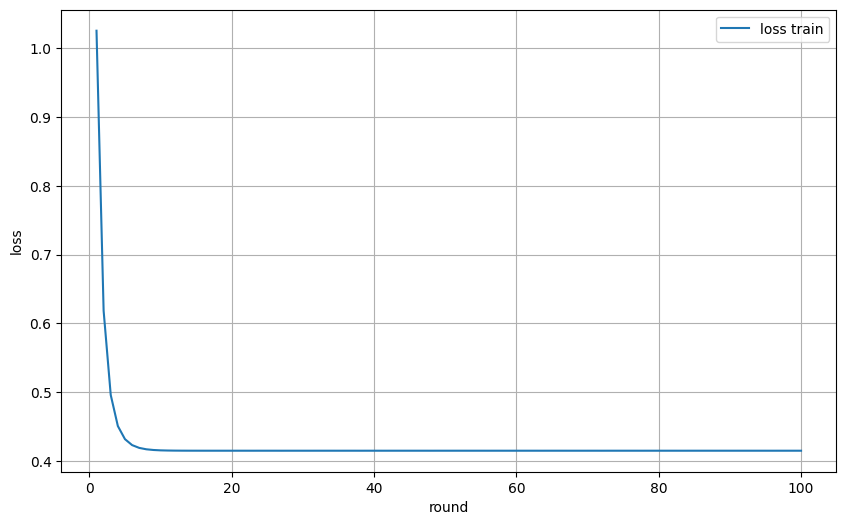

均方误差 (MSE): 0.4145
均方根误差 (RMSE): 0.6438
平均绝对误差 (MAE): 0.4777
R² 分数: 0.5855


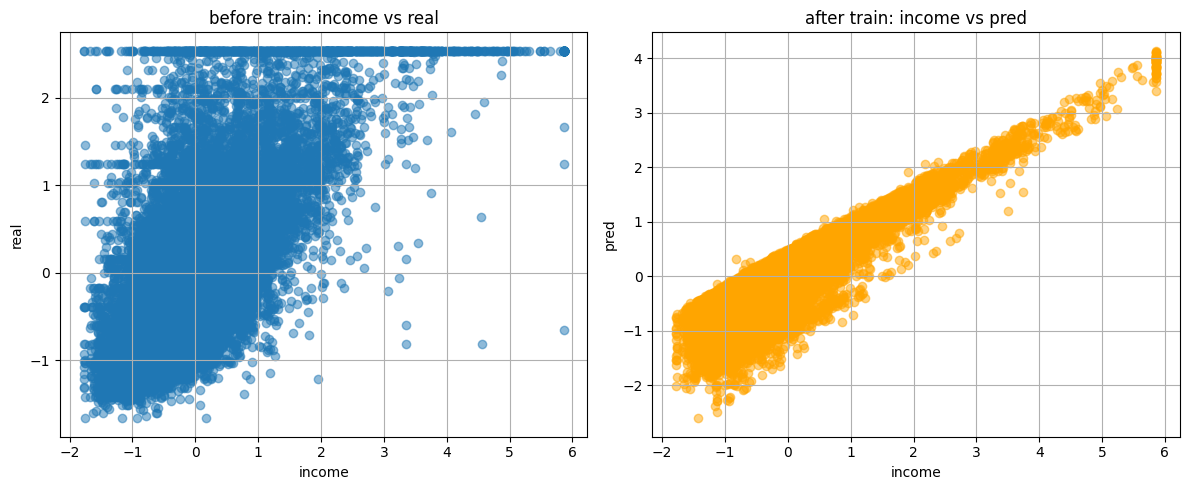

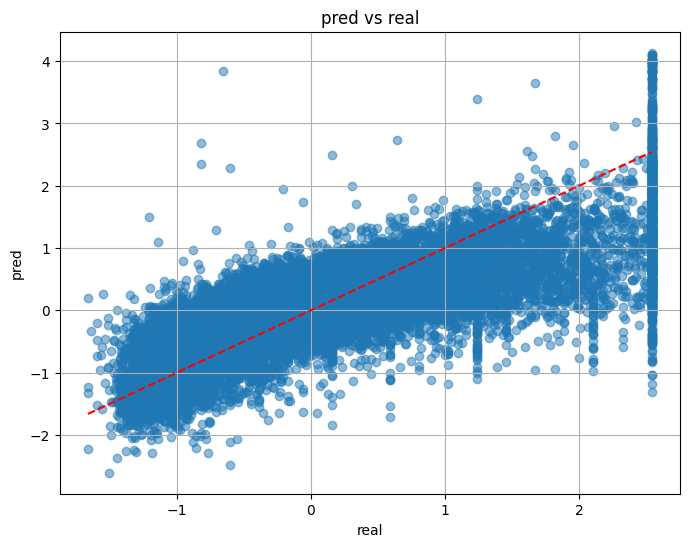

In [139]:
H_dataset = CSVDataset('input.csv', 'output.csv')

train_loader = H_dataset.get_dataloader(batch_size=64)

model = model_linear(H_dataset.get_feature_dim(), is_classification=False)

model.fit(train_loader, epochs=100, lr=0.001)

# 绘制训练曲线
model.plot_training_curve()

# # 评估模型
metrics = model.evaluate(train_loader)

# # 获取预测结果
y_pred = model.predict(H_dataset.x_data.values)
y_true = H_dataset.y_data

# # 绘制训练前后的差异（使用第一个特征进行可视化）
first_feature = H_dataset.x_data.iloc[:, 0].values
plot_predictions(
    y_true, 
    y_pred, 
    is_classification=False,
    feature=first_feature,
    feature_name="income"
)